In [2]:
import pandas as pd
import matplotlib.pyplot as plt

###Separate files being loaded independantly

In [3]:
csv_one = pd.read_csv("population_by_zip_2000.csv")

In [4]:
csv_two = pd.read_csv("population_by_zip_2010.csv")

###previewing headers to verify files due not mirror each other

In [5]:
csv_one.head()

,minimum_age,maximum_age,gender,population,zipcode,geo_id
0,10.0,14.0,female,75,39769,8600000US39769
1,85.0,NaN,female,130,44047,8600000US44047
2,30.0,34.0,female,11,42436,8600000US42436
3,22.0,24.0,male,22,99685,8600000US99685
4,67.0,69.0,male,69,04239,8600000US04239


In [6]:
csv_two.head()

,population,minimum_age,maximum_age,gender,zipcode,geo_id
0,50,30.0,34.0,female,61747,8600000US61747
1,5,85.0,NaN,male,64120,8600000US64120
2,1389,30.0,34.0,male,95117,8600000US95117
3,231,60.0,61.0,female,74074,8600000US74074
4,56,0.0,4.0,female,58042,8600000US58042


###Joining the two files into one before performing calculations

In [7]:
merged_data = pd.merge(csv_one, csv_two, on='geo_id', how='inner')
merged_data.head()


,minimum_age_x,maximum_age_x,gender_x,population_x,zipcode_x,geo_id,population_y,minimum_age_y,maximum_age_y,gender_y,zipcode_y
0,10.0,14.0,female,75,39769,8600000US39769,79,45.0,49.0,female,39769
1,10.0,14.0,female,75,39769,8600000US39769,49,5.0,9.0,male,39769
2,10.0,14.0,female,75,39769,8600000US39769,40,15.0,17.0,male,39769
3,10.0,14.0,female,75,39769,8600000US39769,53,10.0,14.0,male,39769
4,10.0,14.0,female,75,39769,8600000US39769,31,62.0,64.0,male,39769


###need to reorder columns for visual aesthetics

In [8]:
merged_data = merged_data.reindex(sorted(merged_data.columns), axis=1)
merged_data.head()

,gender_x,gender_y,geo_id,maximum_age_x,maximum_age_y,minimum_age_x,minimum_age_y,population_x,population_y,zipcode_x,zipcode_y
0,female,female,8600000US39769,14.0,49.0,10.0,45.0,75,79,39769,39769
1,female,male,8600000US39769,14.0,9.0,10.0,5.0,75,49,39769,39769
2,female,male,8600000US39769,14.0,17.0,10.0,15.0,75,40,39769,39769
3,female,male,8600000US39769,14.0,14.0,10.0,10.0,75,53,39769,39769
4,female,male,8600000US39769,14.0,64.0,10.0,62.0,75,31,39769,39769


###sum population totals and assign to variable

In [9]:
population_x_total = sum(merged_data.population_x)
print(population_x_total)

population_y_total = sum(merged_data.population_y)
print(population_y_total)

41833409205
44761865148


###Display visual comparison of population change from 2000-2010

<AxesSubplot: >

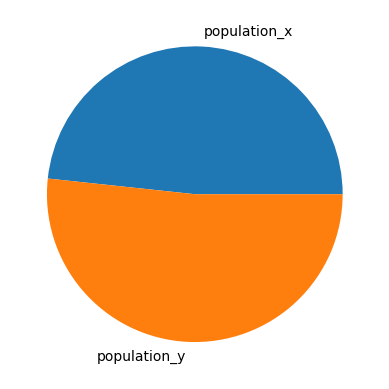

In [19]:
merged_data[merged_data.columns[7:9]].sum().plot.pie()

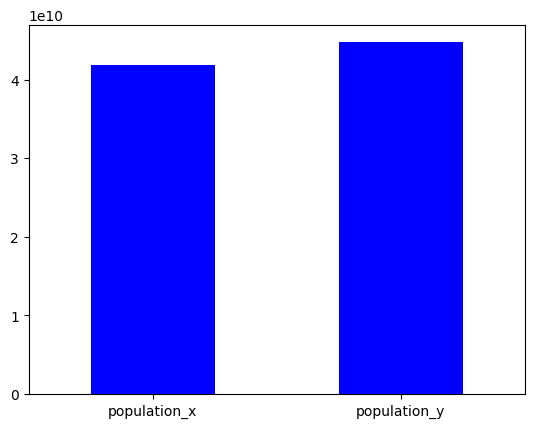

In [27]:
merged_data[merged_data.columns[7:9]].sum().plot.bar(rot=0, color='Blue')
plt.tight_layout
plt.show()

###exploring average min/max ages

In [11]:
avg_max_age_x = merged_data["maximum_age_x"].mean()
print(avg_max_age_x)

avg_max_age_y = merged_data["maximum_age_y"].mean()
print(avg_max_age_y)

avg_min_age_x = merged_data["minimum_age_x"].mean()
print(avg_min_age_x)

avg_min_age_y = merged_data["minimum_age_y"].mean()
print(avg_min_age_y)

42.40909090909091
42.40909090909091
41.52173913043478
41.52173913043478


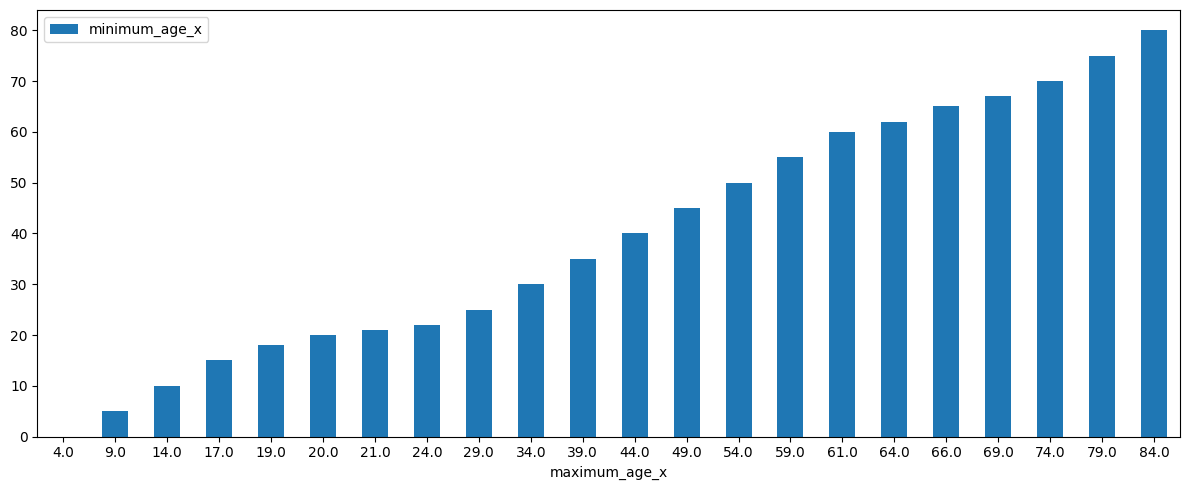

In [12]:

mean_age = merged_data.groupby('maximum_age_x')[['minimum_age_x']].mean().sort_values('minimum_age_x')


ax = mean_age.plot.bar(rot=0, figsize=(12, 5))
ax.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()


###Establish gender ratio per dataset. Values reported are which gender is most prevalent by reporting
region.

In [13]:
male_x = merged_data["gender_x"].value_counts()["male"]
female_x = merged_data["gender_x"].value_counts()["female"]
print("Gender X counts male : ", male_x, ", female : ", female_x)

male_y = merged_data["gender_y"].value_counts()["male"]
female_y = merged_data["gender_y"].value_counts()["female"]
print("Gender Y counts male : ", male_y, ", female : ", female_y)

Gender X counts male :  36899352 , female :  36899352
Gender Y counts male :  36899352 , female :  36899352


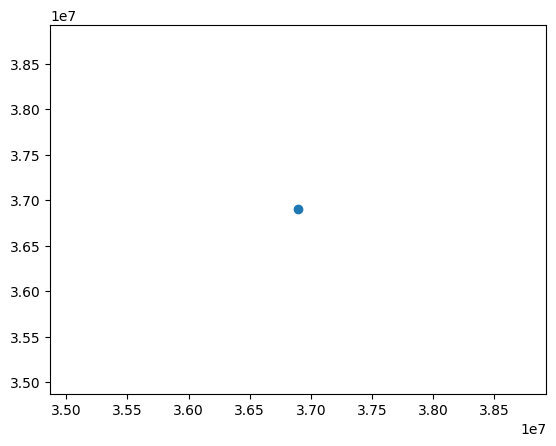

In [14]:
plt.scatter(x = male_x, y = male_y),
plt.show()

###verifying the gender result counts are accurate as this seems odd for them to be identical

In [15]:
print(merged_data['gender_x'].value_counts()["male"])
print(merged_data['gender_x'].value_counts()["female"])

36899352
36899352


In [20]:
count_male = merged_data['gender_x']=="male"
count_male.sum()
count_female = merged_data['gender_x']=="female"
count_female.sum()

36899352

<AxesSubplot: >

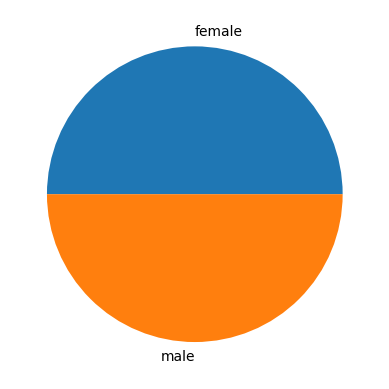

In [22]:
merged_data.groupby(['gender_x']).size().plot.pie()


<AxesSubplot: >

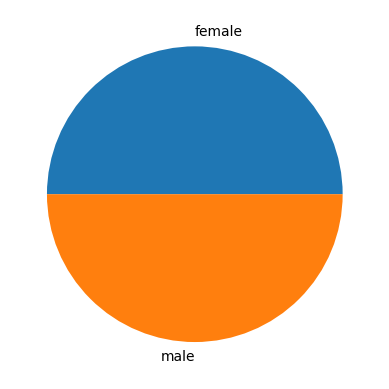

In [21]:
merged_data.groupby(['gender_y']).size().plot.pie()

In [55]:
#gender_count = merged_data.groupby('gender_x')[['gender_y']].mean().sort_values('gender_y')
#gender_count = merged_data.groupby('gender_x')[['gender_y']].value_counts()["male","female"].sort_values('gender_x')
#gender_count = merged_data.groupby('gender_x')[['gender_y']].sum().sort_values('gender_x')
gender_count = merged_data.groubby(["gender_x"].value_counts()["male"])

b = gender_count.plot.bar(rot=0, figsize=(12, 5))
b.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()